<a href="https://colab.research.google.com/github/AdminAbhi/ML-all-in-one-basics/blob/master/Project-ML-with-Python/Loan_payoff_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><font size="6"><strong>Battle of Best Classifier</strong> 
<br>( Loan pay-off Classifier​ — ​ ML Model )</font></h1>



### **Algorithms used:**
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression

# **Project Flow :**
1. Import required libraries
2. Download the dataset
3. Data visualization
4. Data Pre-processing
5. Feature selection and Label Encoding
6. Data Normalization
7. Train-Test Split
8. Classification using Different Algorithms
9. Model Evaluation using Test set
10. Test Data Pre-processing pipeline
11. Calculating Accuracies of All Models

# 1. Lets first import required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

We load a dataset using Pandas library, and apply classification algorithms, and find the best one for this specific dataset by accuracy evaluation methods.


### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

# 2. Download Dataset

In [2]:
# Training data
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv


--2020-12-01 10:05:58--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.1s    

2020-12-01 10:05:59 (153 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object to Standard Date-Time

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# 3. Data visualization



Let’s see how many of each class is in our data set 

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64


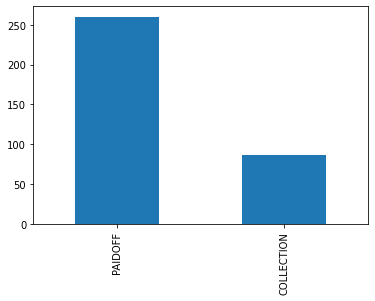

In [6]:
df['loan_status'].value_counts().plot.bar()
print(df['loan_status'].value_counts())

260 people have paid off the loan on time while 86 have gone into collection 


Lets look at gender:

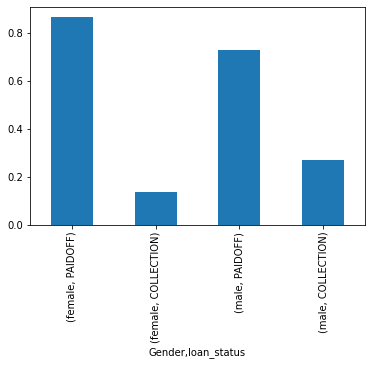

In [7]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True).plot.bar()

86 % of female pay their loans while only 73 % of males pay their loan


### Lets plot some columns to underestand data better:

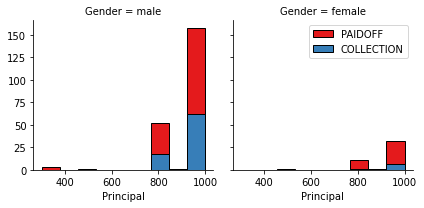

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# 4. Data Pre-processing

### Convert Categorical features to numerical values

#### Lets convert male to 0 and female to 1:


In [9]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0


### How about education?


In [10]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

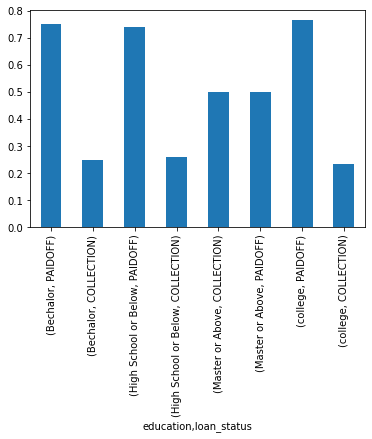

In [11]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True).plot.bar()

### Features before One Hot Encoding

In [12]:
Feature = df[['Principal','terms','age','Gender','education']]
Feature.head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


### Using One Hot Encoding technique to convert categorical varables to binary  variables and appending them to the feature Data Frame. 

In [13]:
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['education'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,1,0,0
1,1000,30,33,1,1,0,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,0,0,0,1
4,1000,30,29,0,0,0,0,1


## 5. Feature selection and Label Encoding.

Lets defind feature sets, X:

In [14]:
X = Feature
X.head()

,Principal,terms,age,Gender,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,1,0,0
1,1000,30,33,1,1,0,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,0,0,0,1
4,1000,30,29,0,0,0,0,1


### What are our lables?

In [15]:
y = df['loan_status'].values
y[0:10]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

### Transform: PAIDOFF = 1, COLLECTION = 0.

In [16]:
from sklearn import preprocessing

le_loan_sta = preprocessing.LabelEncoder()
le_loan_sta.fit(['PAIDOFF','COLLECTION'])
y = le_loan_sta.transform(y) 
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## 6. Data Normalization.
#### getting the data ready for implimentation


 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [17]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -0.38170062,
         1.13639374, -0.07624929, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177,  2.61985426,
        -0.87997669, -0.07624929, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -0.38170062,
        -0.87997669, -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177, -0.38170062,
        -0.87997669, -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004, -0.38170062,
        -0.87997669, -0.07624929,  1.14984679]])

# Classification Using Different Algorithms.

In [18]:
# import scoring methods
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score


## 7. Train-Test Split

In [19]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Let's use the algorithms one by one:


# 8. a) K Nearest Neighbor(KNN).
- Finding the best __k__.

In [20]:
#Training
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 11

std_acc = np.zeros((Ks-1))
mean_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    
    #Accuaracy
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    print('k =',n,'accuaracy:', np.round(mean_acc[n-1], 2))
   

k = 1 accuaracy: 0.63
k = 2 accuaracy: 0.46
k = 3 accuaracy: 0.7
k = 4 accuaracy: 0.56
k = 5 accuaracy: 0.73
k = 6 accuaracy: 0.64
k = 7 accuaracy: 0.74
k = 8 accuaracy: 0.71
k = 9 accuaracy: 0.74
k = 10 accuaracy: 0.71


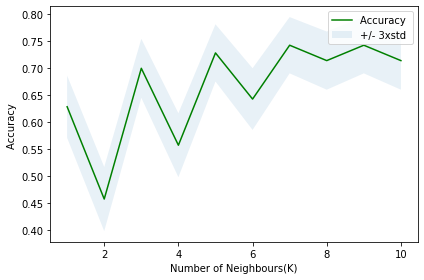

The best accuracy was with 0.7428571428571429 with k = 7
Jaccard index: 0.7391304347826086
F1 score: 0.8500000000000001


In [21]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours(K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1) 
neighAlgo = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1).fit(X_train,y_train)
yhat=neighAlgo.predict(X_test)

print('Jaccard index:',metrics.jaccard_score(y_test, yhat))
print('F1 score:',metrics.f1_score(y_test, yhat))

# 8. b) Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
from sklearn import tree

#Modelling
clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, y_train)

#Prediction
y_pred=clf_tree.predict(X_train)

trainScores = {}
trainScores['Tree-jaccard']=jaccard_score(y_train, y_pred)
trainScores['Tree-f1-score']=f1_score(y_train, y_pred, average='weighted')

trainScores

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


{'Tree-f1-score': 0.8474117399027693, 'Tree-jaccard': 0.8027522935779816}

In [23]:
#!pip install graphviz
#!pip install pydotplus
import graphviz 
import pydotplus

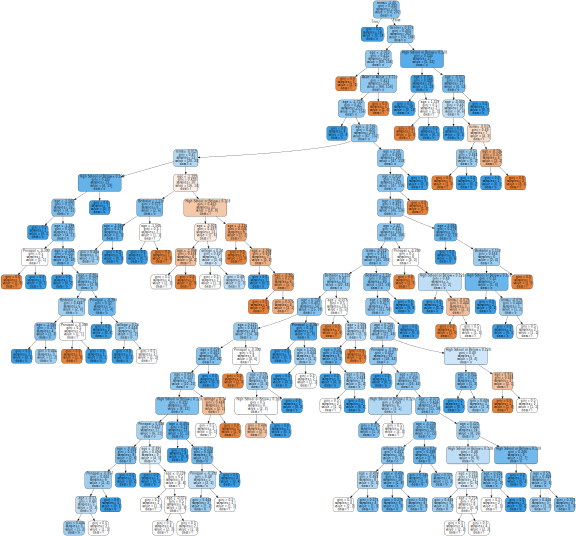

In [24]:
dot_data = tree.export_graphviz(clf_tree, out_file=None, 
                     feature_names=['Principal',
                                    'terms','age',
                                    'Gender',
                                    'Bechalor',
                                    'High School or Below',
                                    'Master or Above',
                                    'college'
                                   ],  
                     class_names='loan_status',  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"8,8!"')
gvz_graph = graphviz.Source(graph.to_string())

gvz_graph

# 8. c) Support Vector Machine

In [25]:
from sklearn import svm

# Modelling and training
clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train) 

clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train, y_train) 

clf_poly = svm.SVC(kernel='poly')
clf_poly.fit(X_train, y_train) 

clf_sig = svm.SVC(kernel='sigmoid')
clf_sig.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
# Prediction
yhat_rbf = clf_rbf.predict(X_test)
yhat_linear = clf_linear.predict(X_test)
yhat_poly = clf_poly.predict(X_test)
yhat_sig = clf_sig.predict(X_test)

In [27]:
#Evaluation

print('jaccard scores:\n')
print('RBF:',jaccard_score(y_test, yhat_rbf))
print('Linear:',jaccard_score(y_test, yhat_linear))
print('Polynomial',jaccard_score(y_test, yhat_poly))
print('Sigmoid',jaccard_score(y_test, yhat_sig))
print('Best Kernel: Linear')

jaccard scores:

RBF: 0.8285714285714286
Linear: 0.8142857142857143
Polynomial 0.7857142857142857
Sigmoid 0.8285714285714286
Best Kernel: Linear


# 8. d) Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

# Modelling
LR_lib = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR_sag = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)

In [29]:
# Prediction
yhat_lib = LR_lib.predict(X_test)
yhat_sag = LR_sag.predict(X_test)

yhat_prob_lib = LR_lib.predict_proba(X_test)
yhat_prob_sag = LR_sag.predict_proba(X_test)

In [30]:
# Evaluation
print('F1 Score:')
print('liblinear: ',f1_score(y_test, yhat_lib), end=' ')
print('sag: ',f1_score(y_test, yhat_sag))

print('\njaccard_score')
print('liblinear: ',jaccard_score(y_test, yhat_lib), end=' ')
print('sag: ',jaccard_score(y_test, yhat_sag))

print('\nBEST OPTION: Sag solver')

F1 Score:
liblinear:  0.8976377952755905 sag:  0.90625

jaccard_score
liblinear:  0.8142857142857143 sag:  0.8285714285714286

BEST OPTION: Sag solver


# 9. Model Evaluation using Test set

In [31]:
#Model Evaluation Data
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-12-01 10:06:03--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2020-12-01 10:06:04 (627 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [32]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


## 10. Test Data Pre-processing pipeline

In [33]:
# Converting date to Std. date format
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

# Replacing Male = 0 and Female = 1 in gender column
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

# Creating Test date with required features
Feature2 = test_df[['Principal','terms','age','Gender']]

# Adding one-hot encoded Education columns
Feature2 = pd.concat([Feature2,pd.get_dummies(test_df['education'])], axis=1)


In [34]:
# Checking Features
X_TEST = Feature2
X_TEST.head()

,Principal,terms,age,Gender,Bechalor,High School or Below,Master or Above,college
0,1000,30,50,1,1,0,0,0
1,300,7,35,0,0,0,1,0
2,1000,30,43,1,0,1,0,0
3,1000,30,26,0,0,0,0,1
4,800,15,29,0,1,0,0,0


In [35]:
# Creating Test labels
Y_TEST = test_df['loan_status'].values
Y_TEST[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [36]:
# Transform: PAIDOFF = 1, COLLECTION = 0.
le_loan_sta2 = preprocessing.LabelEncoder()
le_loan_sta2.fit(['PAIDOFF','COLLECTION'])
Y_TEST = le_loan_sta2.transform(Y_TEST) 
Y_TEST

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [37]:
# applying normalization
X_TEST= preprocessing.StandardScaler().fit(X_TEST).transform(X_TEST)
X_TEST[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211,  2.39791576,
        -0.79772404, -0.19611614, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054, -0.41702883,
        -0.79772404,  5.09901951, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211, -0.41702883,
         1.25356634, -0.19611614, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054, -0.41702883,
        -0.79772404, -0.19611614,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  2.39791576,
        -0.79772404, -0.19611614, -0.86135677]])

# 11. Calculating Accuracies of All Models

## K-Nearest Neighbor (KNN) Model Evaluation

In [38]:
Y_hat_KNN = neighAlgo.predict(X_TEST)

jc1 = metrics.jaccard_score(Y_TEST, Y_hat_KNN)
fs1 = metrics.f1_score(Y_TEST, Y_hat_KNN)

print('Jaccard index:', jc1)
print('F1 score:', fs1)

Jaccard index: 0.7037037037037037
F1 score: 0.8260869565217392


## Dicision Tree Model Evaluation

In [39]:
Y_hat_T = clf_tree.predict(X_TEST)

jc2 = metrics.jaccard_score(Y_TEST, Y_hat_T)
fs2 = metrics.f1_score(Y_TEST, Y_hat_T)

print('Jaccard index:', jc2)
print('F1 score:', fs2)

Jaccard index: 0.66
F1 score: 0.7951807228915662


## Support Vector Machine (SVM) Model Evaluation

In [40]:
Y_hat_SVM = clf_linear.predict(X_TEST)

jc3 = metrics.jaccard_score(Y_TEST, Y_hat_SVM)
fs3 = metrics.f1_score(Y_TEST, Y_hat_SVM)

print('Jaccard index:', jc3)
print('F1 score:', fs3)

Jaccard index: 0.7407407407407407
F1 score: 0.851063829787234


## Logistic Regression Model Evaluation 

In [41]:
y_hat_LR = LR_sag.predict(X_TEST)

jc4 = metrics.jaccard_score(Y_TEST, y_hat_LR)
fs4 = metrics.f1_score(Y_TEST, y_hat_LR)

print('Jaccard index:', jc4)
print('F1 score:', fs4)

Jaccard index: 0.7407407407407407
F1 score: 0.851063829787234


# 12. **Result and Conclusion**:
The accuracy of the built model using different evaluation metrics:

In [42]:
list_jc = [jc1, jc2, jc3, jc4]
list_fs = [fs1, fs2, fs3, fs4]

# fomulate the report format
df = pd.DataFrame(list_jc, index=['KNN','Decision Tree','SVM','Logistic Regression'])
df.columns = ['Jaccard Index']
df.insert(loc=1, column='F1-score', value=list_fs)
df.columns.name = 'Algorithm'
df

Algorithm,Jaccard Index,F1-score
KNN,0.703704,0.826087
Decision Tree,0.660000,0.795181
SVM,0.740741,0.851064
Logistic Regression,0.740741,0.851064


### We can conclude here that for the data set of Loan case, **Support Vector Machine and Logistic Regression** classifiers are no doubt the winners here as both gives the same Accuracy. So any one of them can be used for classification of this kind of use case.
 